### Dans ce script, nous allons analyser le fichier " PS1 " qui represente les données brutes de pression pris par  capteur 1 . 

#### Le but principale est de script est de transformer les données brutes en un ensemble de caractéristiques pertinentes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ps1 = pd.read_csv("PS1.txt", sep="\t", header=None)

print(ps1.shape) 


(2205, 6000)


##### Cela représente la taille du fichier text avec 2205 Cycles et une fréquence de 100 HZ (6000 données par cycle de 60 secondes) 

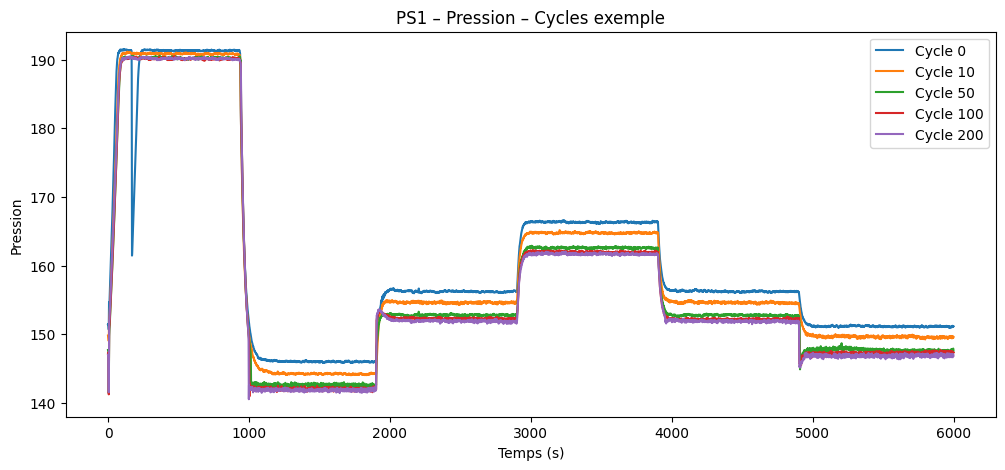

In [2]:
plt.figure(figsize=(12,5))
for i in [0, 10, 50, 100, 200]:
    plt.plot(ps1.iloc[i], label=f"Cycle {i}")

plt.title("PS1 – Pression – Cycles exemple")
plt.xlabel("Temps (s)")
plt.ylabel("Pression")
plt.legend()
plt.show()


### Ce graphique montre l'évolution de la pression mesurée par le capteur PS1 (en bar) au cours du temps (en secondes) pour 5 cycles différents .
 - On remarque que le signal de pression suit un motif répétitif en forme d'escalier.
 - On remarque également qu'au fur a mesure des cycles , la pression devient légèrement plus basse que son pattern précedent ( reste a voir).
   

C:\Users\boudi\AppData\Local\Temp\ipykernel_26880\2043890098.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ps1_mean, ps1_median], labels=["Mean", "Median"])


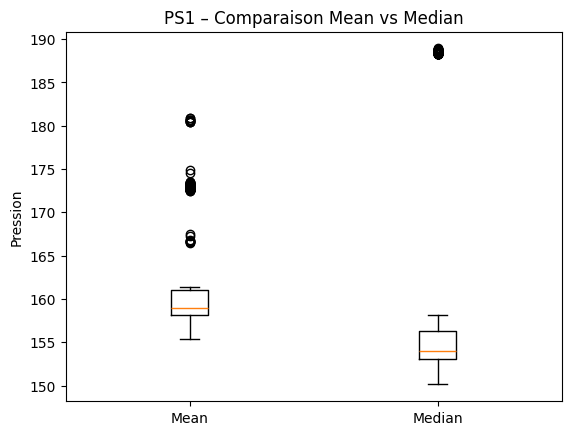

In [3]:
ps1_mean = ps1.mean(axis=1)
ps1_median = ps1.median(axis=1)

plt.boxplot([ps1_mean, ps1_median], labels=["Mean", "Median"])
plt.title("PS1 – Comparaison Mean vs Median")
plt.ylabel("Pression")
plt.show()


### Ce grapheique compare 2 statistiques calculées sur tous les cycles : la moyenne et la médiane des pressions PS1.
- On remarque que la moyenne est systématiquement plus élevée que la médiane ( cela peux etre a cause du premier palier très haut du script précedent). 
- On remarque aussi que la moyenne a beaucoup plus d'outliers que la médiane. 
- En terme de dispersion, la moyenne est plus dispersée ce qui signifie que la médiane est une mesure plus stable et fiable pour caractériser PS1.

* Au finale nous avons décider de garder la médiane au détriment de la moyenne car elle represente au mieux les données . 


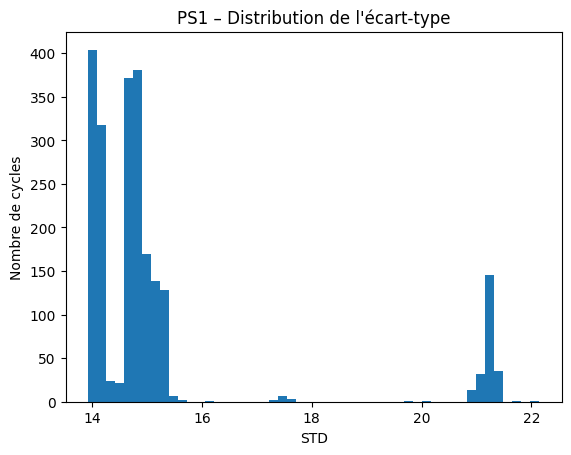

In [4]:
ps1_std = ps1.std(axis=1)

plt.hist(ps1_std, bins=50)
plt.title("PS1 – Distribution de l'écart-type")
plt.xlabel("STD")
plt.ylabel("Nombre de cycles")
plt.show()


### Cet histogramme montre la répartition des valeurs d'écart-type de PS1 calculées pour tous les cycles. 

- L'écart-type de PS1 montre deux populations distinctes de cycles : la majorité (1400) avec une variabilité normale ( 14 bar), et une minorité (200) avec une variabilité élevée (22 bar) indiquant probablement des défaillances.

- L'écart-type de PS1 est donc une caractéristique TRÈS importante a observer . 

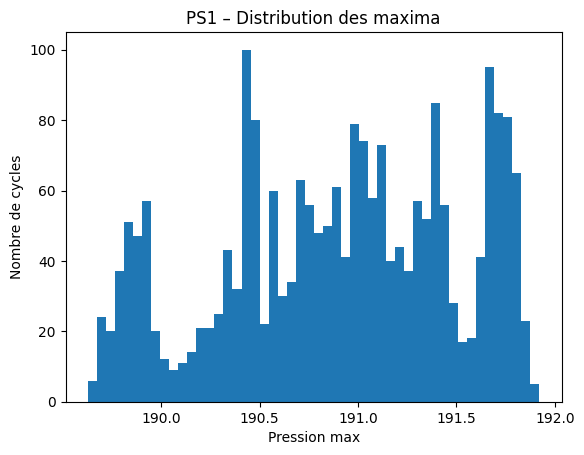

In [5]:
ps1_max = ps1.max(axis=1)

plt.hist(ps1_max, bins=50)
plt.title("PS1 – Distribution des maxima")
plt.xlabel("Pression max")
plt.ylabel("Nombre de cycles")
plt.show()


### Cet histogramme montre la répartition des valeurs maximales de pression atteintes par le capteur PS1 au cours des 2205 cycles.

- On remarque la présence de plusieurs pics .
- Cette caractéristique est une information complémentaire sur la capacité du système à atteindre les pressions nominales et peut etre aider à détecter certains types de défaillances spécifiques (pompe, accumulateur).